In [1]:
import numpy as np
import scipy
import robust_mean_estimate as rl
import importlib as il
from scipy import special
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

fsize = 20
fpad = 10
figsize = (8,4)
fontname = 'serif'

In [6]:
"loss, time vs dimention -- lognormal -- dense biased -- set data"

il.reload(rl)

trials = 10

m, k, eps = 100, 4, 0.05
xs = list(np.arange(100, 400, 50))

keys = [rl.Oracle, rl.RME_sp, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model = rl.LognormalModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(m = m, k = k, eps = eps)

inputfilename = 'data/loss-time-vs-dimention-lognormal.pkl'
plot_d = rl.load_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
plot_d.setdata_tofile(filename = inputfilename, xvar_name = 'd', trials = trials, xs = xs)

[ 0.  0.  1.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -5.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 4.97822634e+00 -4.47060013e-01 -1.17842628e+00 ...  8.49539619e-01
   6.19713967e-01  2.03150103e+00]
 [-4.39970396e-01 -6.98381429e-01  9.18228001e-01 ...  2.45201416e-01
   8.46736963e-01  1.87260332e+00]
 [-2.42119287e-01 -5.65375650e-01  2.24883396e+00 ... -1.88950286e+00
  -7.93060366e-01 -1.01495099e+00]
 ...
 [-2.34322189e+00 -1.24727392e+00 -3.26776548e+00 ... -9.37315404e-01
  -2.61418705e+00 -1.42100201e+00]
 [-2.47169662e+00 -3.05672858e+00  8.72861293e+00 ...  1.12641989e-01
  -3.11940534e+00 -5.72497872e-03]
 [-1.15791922e+00  6.62746325e+00 -4.18744354e-01 ... -3.249524

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

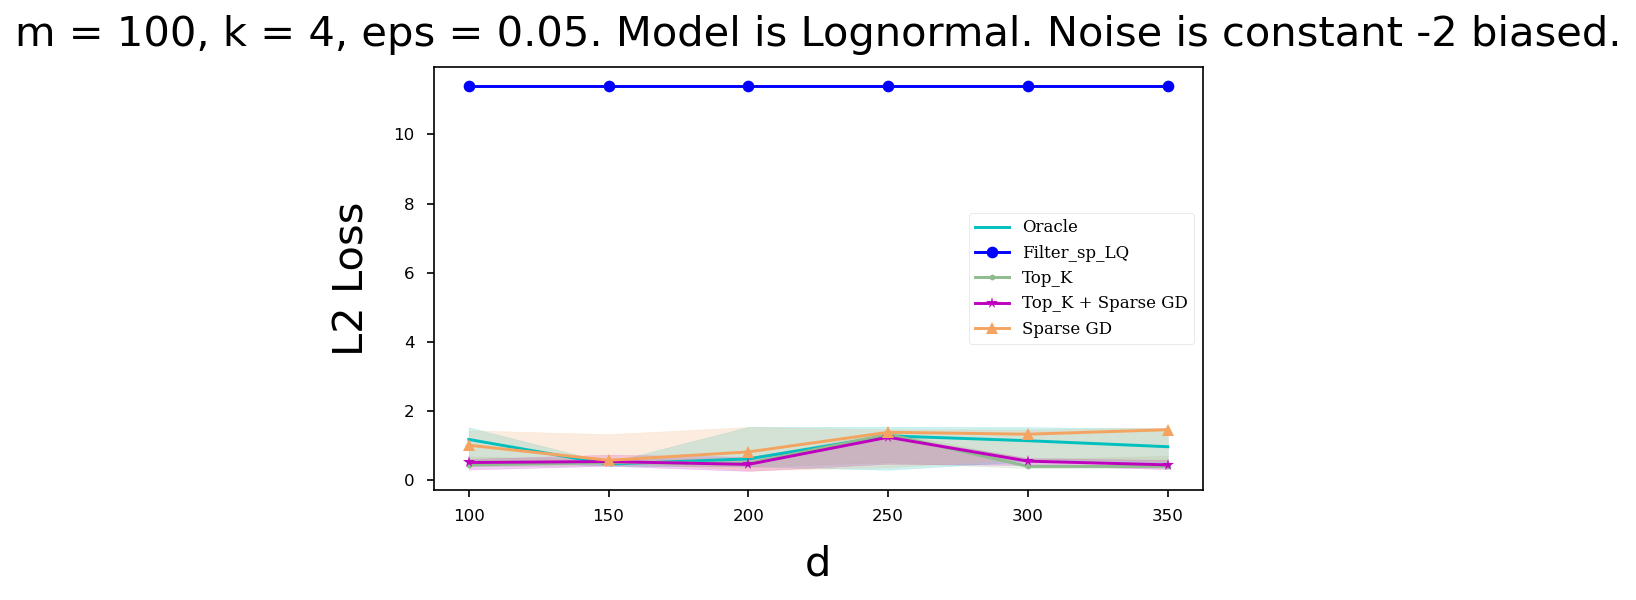

<Figure size 1200x600 with 0 Axes>

In [9]:
"loss vs dimention -- lognormal -- dense biased -- plot"

il.reload(rl)

trials = 10

m, k, eps = 100, 4, 0.05
xs = list(np.arange(100, 400, 50))

keys = [rl.Oracle, rl.RME_sp, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model = rl.LognormalModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(m = m, k = k, eps = eps)

outputfilename = 'figs/loss-vs-dimention-lognormal.pdf'

title = 'm = {m}, k = {k}, eps = {eps}. Model is Lognormal. Noise is constant -2 biased.'.format(m = m, k = k, eps = eps)
xlabel = 'd'
ylabel = 'L2 Loss'

plot_d_loss = rl.plot_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)

plot_d_loss.plotxy_fromfile(outputfilename = outputfilename, filename = inputfilename, title = title, xlabel = xlabel, ylabel = ylabel, figsize = figsize, fsize = fsize, fpad = fpad, xs = xs, fontname = fontname)

Oracle_time
[[0.00187087 0.00221801 0.00199103 0.002496   0.00147796 0.00173497]
 [0.00170588 0.00138474 0.00147891 0.001333   0.0020349  0.00178909]
 [0.00116801 0.00110197 0.00148487 0.00132585 0.00198483 0.00195479]
 [0.001508   0.00141501 0.00162029 0.00176215 0.00154805 0.00181603]
 [0.00157428 0.0014329  0.00147104 0.00179601 0.00166392 0.00189281]
 [0.00180602 0.00148797 0.00167608 0.00140619 0.00202703 0.00166488]
 [0.00121284 0.00178504 0.00137687 0.00128007 0.00166416 0.001827  ]
 [0.0018549  0.00134706 0.00140715 0.00149202 0.00248694 0.00190687]
 [0.00196195 0.0013833  0.00145531 0.00148273 0.0017271  0.0017252 ]
 [0.00166106 0.00111699 0.00158691 0.00187898 0.00155497 0.00178289]]
RME_sp_time
[[0.00038385 0.00064898 0.00052905 0.00057602 0.00057697 0.00066519]
 [0.000597   0.0003593  0.00047898 0.00047708 0.00060081 0.000705  ]
 [0.00026393 0.00032115 0.00040293 0.00047421 0.00064588 0.00070596]
 [0.00026083 0.00032568 0.00051284 0.00049496 0.00059199 0.0006578 ]
 [0.00025

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

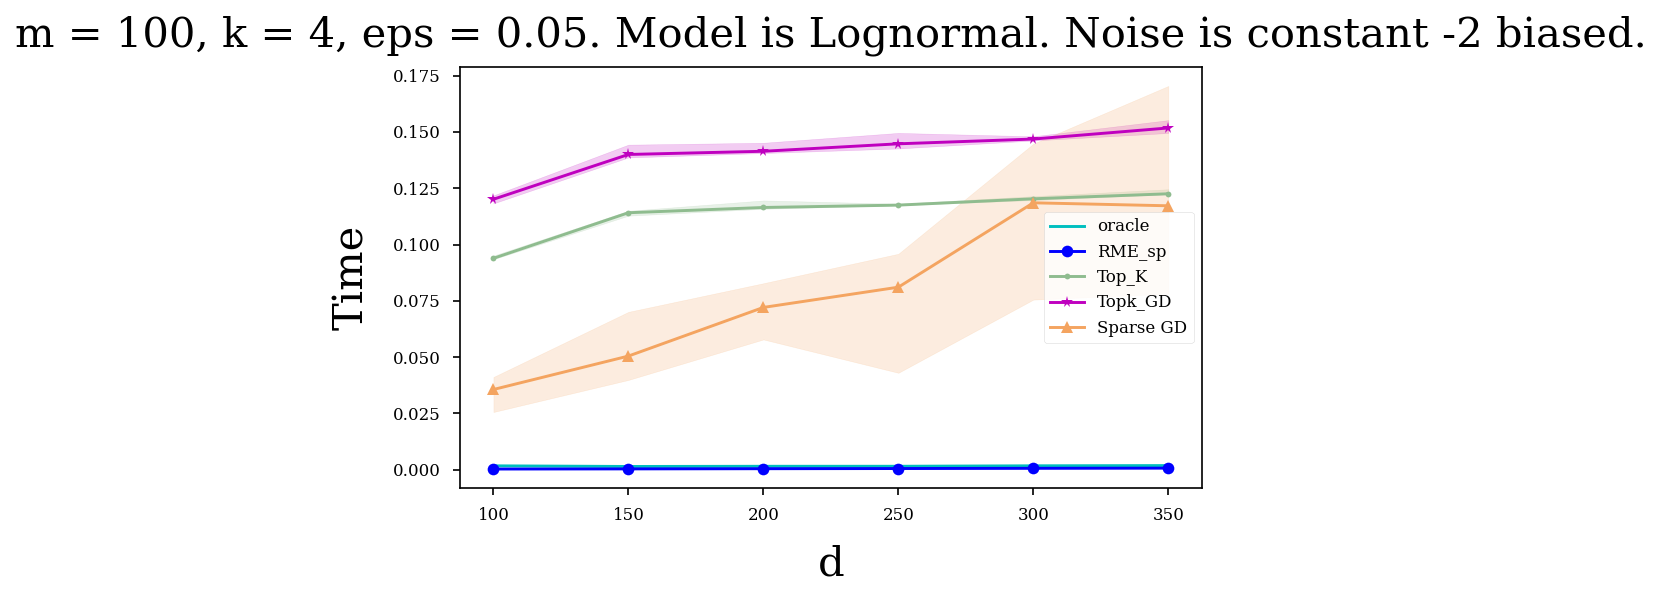

<Figure size 1200x600 with 0 Axes>

In [13]:
"time vs dimention -- lognormal -- dense biased -- plot"

il.reload(rl)

trials = 10

m, k, eps = 100, 4, 0.05
xs = list(np.arange(100, 400, 50))

keys = [rl.Oracle, rl.RME_sp, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model = rl.LognormalModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(m = m, k = k, eps = eps)

outputfilename = 'figs/time-vs-dimention-lognormal.pdf'

title = 'm = {m}, k = {k}, eps = {eps}. Model is Lognormal. Noise is constant -2 biased.'.format(m = m, k = k, eps = eps)
xlabel = 'd'
ylabel = 'Time'

plot_d_time = rl.plot_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)

plot_d_time.plotxy_fromfile_time(outputfilename = outputfilename, filename = inputfilename, title = title, xlabel = xlabel, ylabel = ylabel, figsize = figsize, fsize = fsize, fpad = fpad, xs = xs, fontname = fontname)